# Analisis Exploratorio

El analisis exploratorio se usa para i obtener un resumen que describa los datos. Generalmente se usa como etapa previa para otros tipos de analisis y generalmente se usan histogramas y graficos que muestren la relacion entre las distintas variables. Al mismo tiempo, nos interesa  

In [2]:
import pandas as pd
pd.__version__

'1.0.5'

In [206]:
data_teams = {'year': 
        [2010 , 2011 , 2012 ,
        2010 , 2011 , 2012 ,
        2010 , 2011 , 2012],
        'team': [
        'Rangers','Rangers',
        'Rangers',' coloColo',
        'Colo Colo','ColoColo',
        'Universidad de Chile','Universidad de Chile',
        'Universidad de Chile'],
        'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,
        'draws':[6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,
        'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]
        }

df = pd.DataFrame(data_teams ,columns=data_teams.keys())

In [207]:
df.tail()

,year,team,wins,draws,losses
4,2011,Colo Colo,32,4,2
5,2012,ColoColo,26,7,5
6,2010,Universidad de Chile,21,8,9
7,2011,Universidad de Chile,17,10,11
8,2012,Universidad de Chile,19,8,11


In [9]:
df.dtypes

year       int64
team      object
wins       int64
draws      int64
losses     int64
dtype: object

In [208]:
df['team'] = df['team'].astype('category')
df['year']=pd.to_datetime(df['year'], format='%Y')

In [210]:
df['team'].unique()

[Rangers, coloColo, Colo Colo, ColoColo, Universidad de Chile]
Categories (5, object): [Rangers, coloColo, Colo Colo, ColoColo, Universidad de Chile]

In [11]:
df.dtypes

year      datetime64[ns]
team            category
wins               int64
draws              int64
losses             int64
dtype: object

La tabla ``df`` se encuentra indexada mediante un objeto del tipo ``pd.Index`` que nos sirve para acceder a los registros individuales.

In [13]:
print(df.index)

RangeIndex(start=0, stop=9, step=1)


In [14]:
df[df.index==0]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2


In [ ]:
df.iloc[0]

year      2010-01-01 00:00:00
team                  Rangers
wins                       30
draws                       6
losses                      2
Name: 0, dtype: object

In [15]:
df[0:2]

,year,team,wins,draws,losses
0,2010-01-01,Rangers,30,6,2
1,2011-01-01,Rangers,28,7,3


In [19]:
sum_data=df.groupby('year').sum()

In [20]:
print(sum_data)

            wins  draws  losses
year                           
2010-01-01    80     19      15
2011-01-01    77     21      16
2012-01-01    77     19      18


In [21]:
sum_data.index

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01'], dtype='datetime64[ns]', name='year', freq=None)

# Analisis Exploratorio de Casos COVID 

En este laboratorio realizaremos un analisis exploratorio de casos confirmados de COVID-19. Para ello, accederemos a las API del Centro Europeo para la Prevencion y Control de Enfermedades (https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [45]:
import requests 
import json

response=requests.get('https://opendata.ecdc.europa.eu/covid19/casedistribution/json/')

if response.status_code==200:
    s=json.loads(response.text,encoding='utf-8',strict=False)
    data=pd.DataFrame(s['records'])
    data.to_csv('covid_data.csv')
else:
    data=pd.read_csv('covid_data.csv')

In [83]:
data.shape

(27622, 8)

In [24]:
data.dtypes

dateRep                     object
day                         object
month                       object
year                        object
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2019                float64
continentExp                object
dtype: object

In [48]:
data['dateRep']=pd.to_datetime(data['dateRep'],format='%d/%m/%Y')

In [49]:
data.dtypes

dateRep                    datetime64[ns]
day                                object
month                              object
year                               object
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2019                       float64
continentExp                       object
dtype: object

In [50]:
data['dateRep'].min()

Timestamp('2019-12-31 00:00:00')

In [51]:
data['dateRep'].max()

Timestamp('2020-07-04 00:00:00')

In [53]:
data['countriesAndTerritories'] = data['countriesAndTerritories'].astype('category')
data['geoId'] = data['geoId'].astype('category')
data['countryterritoryCode'] = data['countryterritoryCode'].astype('category')
data['continentExp'] = data['continentExp'].astype('category')
data.drop(['day','month','year'],axis=1,inplace=True)

KeyError: ignored

In [196]:
data['continentExp'].unique()

[Asia, Europe, Africa, America, Oceania, Other]
Categories (6, object): [Asia, Europe, Africa, America, Oceania, Other]

In [54]:
data.dtypes

dateRep                    datetime64[ns]
cases                               int64
deaths                              int64
countriesAndTerritories          category
geoId                            category
countryterritoryCode             category
popData2019                       float64
continentExp                     category
dtype: object

In [31]:
data['continentExp'].unique()

[Asia, Europe, Africa, America, Oceania, Other]
Categories (6, object): [Asia, Europe, Africa, America, Oceania, Other]

In [192]:
data.dtypes

dateRep                    datetime64[ns]
cases                               int64
deaths                              int64
countriesAndTerritories          category
geoId                            category
countryterritoryCode             category
popData2019                       float64
continentExp                     category
dtype: object

In [190]:
latin_america=data[data['continentExp']=='America']

In [193]:
latin_america['geoId']

695      AI
696      AI
697      AI
698      AI
699      AI
         ..
27064    VE
27065    VE
27066    VE
27067    VE
27068    VE
Name: geoId, Length: 5747, dtype: category
Categories (210, object): [AD, AE, AF, AG, ..., YE, ZA, ZM, ZW]

In [57]:
latin_america['countryterritoryCode'].unique()

[AIA, ATG, ARG, ABW, BHS, ..., TCA, USA, VIR, URY, VEN]
Length: 49
Categories (49, object): [AIA, ATG, ARG, ABW, ..., USA, VIR, URY, VEN]

In [291]:
group_america=latin_america[['countriesAndTerritories','cases','geoId']].groupby('countriesAndTerritories',observed=True)

In [292]:
sum_america=group_america.sum()
sum_america.sort_values(by=['cases'],inplace=True,ascending=False)

In [293]:
sum_america.head()

,cases
countriesAndTerritories,
United_States_of_America,2794321
Brazil,1539081
Peru,295599
Chile,288089
Mexico,245251


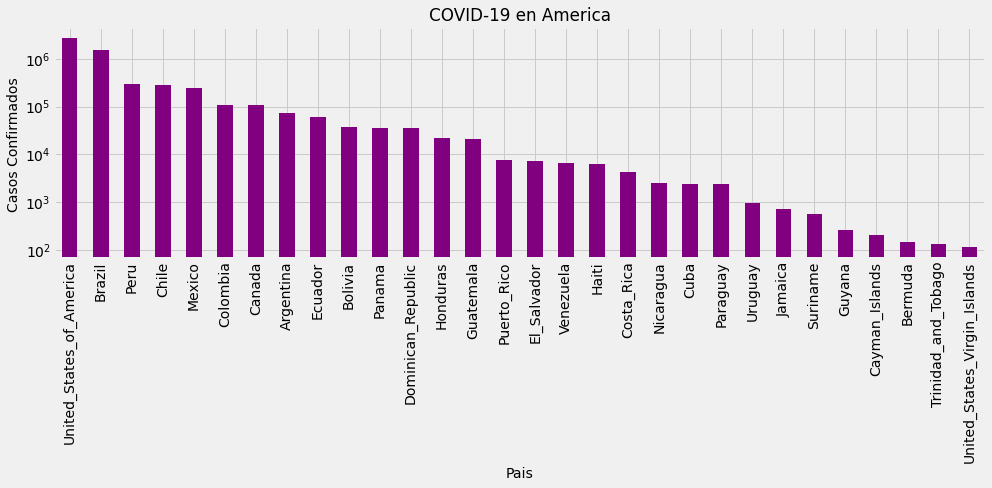

In [170]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'log'

sum_america['cases'].head(30).plot(ax=ax, kind="bar", color='purple')

ax.set_yscale(scale)

ax.set_title(f'COVID-19 en America', fontsize='large')
ax.set_xlabel(f'Pais', fontsize='medium')
ax.set_ylabel(f'Casos Confirmados ', fontsize='medium')

plt.show()

In [163]:
Q1 = sum_america['cases'].between(sum_america['cases'].quantile(.90), sum_america['cases'].quantile(1.))

In [173]:
pos_rate=sum_america[Q1]['cases']

In [175]:
pos_rate.index

CategoricalIndex(['United_States_of_America', 'Brazil', 'Peru', 'Chile',
                  'Mexico', 'Colombia', 'Canada', 'Argentina', 'Ecuador',
                  'Bolivia', 'Panama', 'Dominican_Republic', 'Honduras',
                  'Guatemala', 'Puerto_Rico', 'El_Salvador', 'Venezuela',
                  'Haiti', 'Costa_Rica', 'Nicaragua', 'Cuba'],
                 categories=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Barbuda', 'Argentina', ...], ordered=False, name='countriesAndTerritories', dtype='category')

In [177]:
pos_rate.head()

countriesAndTerritories
United_States_of_America    2794321
Brazil                      1539081
Peru                         295599
Chile                        288089
Mexico                       245251
Name: cases, dtype: int64

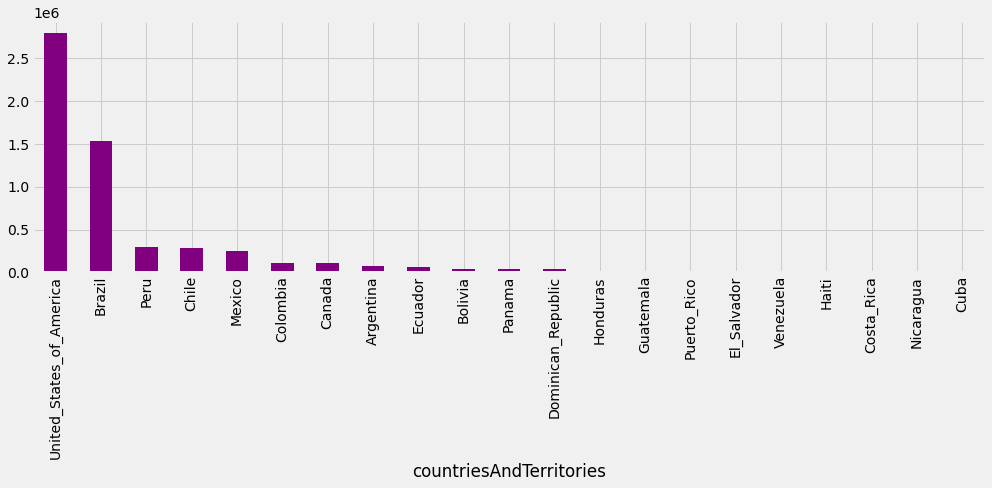

In [178]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))
pos_rate.plot(ax=ax, kind="bar", color='purple')
plt.show()

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Reportar la suma de casos confirmados en America, normalizados por cada millon de habitantes.
2.   Reportar la tasa de mortalidad en America, normalizados por cada millon de habitantes.
3. Reportar la tasa de positividad en America, normalizados por cantidad de test PCR realizados.



In [88]:
pcr_test=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [179]:
pcr_test.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [180]:
pcr_test['location'] = pcr_test['location'].astype('category')
pcr_test['continent'] = pcr_test['continent'].astype('category')
pcr_test['iso_code'] = pcr_test['iso_code'].astype('category')


In [194]:
pcr_test['continent'].unique()

[Asia, Europe, Africa, North America, South America, Oceania, NaN]
Categories (6, object): [Asia, Europe, Africa, North America, South America, Oceania]

In [198]:
data['geoId'].unique()

[AF, AL, DZ, AD, AO, ..., VN, EH, YE, ZM, ZW]
Length: 210
Categories (210, object): [AF, AL, DZ, AD, ..., EH, YE, ZM, ZW]

In [199]:
pcr_test['iso_code'].unique()

[AFG, ALB, DZA, AND, AGO, ..., YEM, ZMB, ZWE, OWID_WRL, NaN]
Length: 212
Categories (211, object): [AFG, ALB, DZA, AND, ..., YEM, ZMB, ZWE, OWID_WRL]

In [200]:
data['continentExp'].unique()

[Asia, Europe, Africa, America, Oceania, Other]
Categories (6, object): [Asia, Europe, Africa, America, Oceania, Other]

In [278]:
pcr_north=pcr_test[pcr_test['continent']=='North America']
pcr_south=pcr_test[pcr_test['continent']=='North America']


In [279]:
pcr_south=pcr_south[['location','total_tests']].dropna()

In [280]:
pcr_north=pcr_north[['location','total_tests']].dropna()

In [281]:
sum_south=pcr_south.groupby('location').max().dropna()

In [294]:
sum_north=pcr_north.groupby('location').max().dropna()

In [295]:
sum_america

,cases
countriesAndTerritories,
United_States_of_America,2794321
Brazil,1539081
Peru,295599
Chile,288089
Mexico,245251
Colombia,109505
Canada,105079
Argentina,72773
Ecuador,60657


In [284]:
sum_south.head(10)

,total_tests
location,
Canada,2848168.0
Costa Rica,33401.0
Cuba,178062.0
El Salvador,162711.0
Mexico,520421.0
Panama,130556.0
United States,33462181.0
